In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
from pandas import Series


In [2]:
file = 'all_data.csv'

In [3]:
data = pd.read_csv(file)

In [4]:
data.head()

,Date,Price
0,2013-04-29 00:00:01,134.444
1,2013-04-29 00:05:01,134.480
2,2013-04-29 00:10:02,134.989
3,2013-04-29 00:15:01,134.979
4,2013-04-29 00:20:01,134.040


In [5]:
data['shift_1'] = data['Price'].shift(1)

In [6]:
data.dropna(axis=0,inplace=True)
data.head()

,Date,Price,shift_1
1,2013-04-29 00:05:01,134.480,134.444
2,2013-04-29 00:10:02,134.989,134.480
3,2013-04-29 00:15:01,134.979,134.989
4,2013-04-29 00:20:01,134.040,134.979
5,2013-04-29 00:25:02,134.960,134.040


In [7]:
data['residual'] = data['Price'] - data['shift_1']

In [8]:
da = data['residual'].values

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-540.11      , -539.24290833, -538.37581667, ...,  498.66581667,
         499.53290833,  500.4       ]),
 <a list of 1200 Patch objects>)

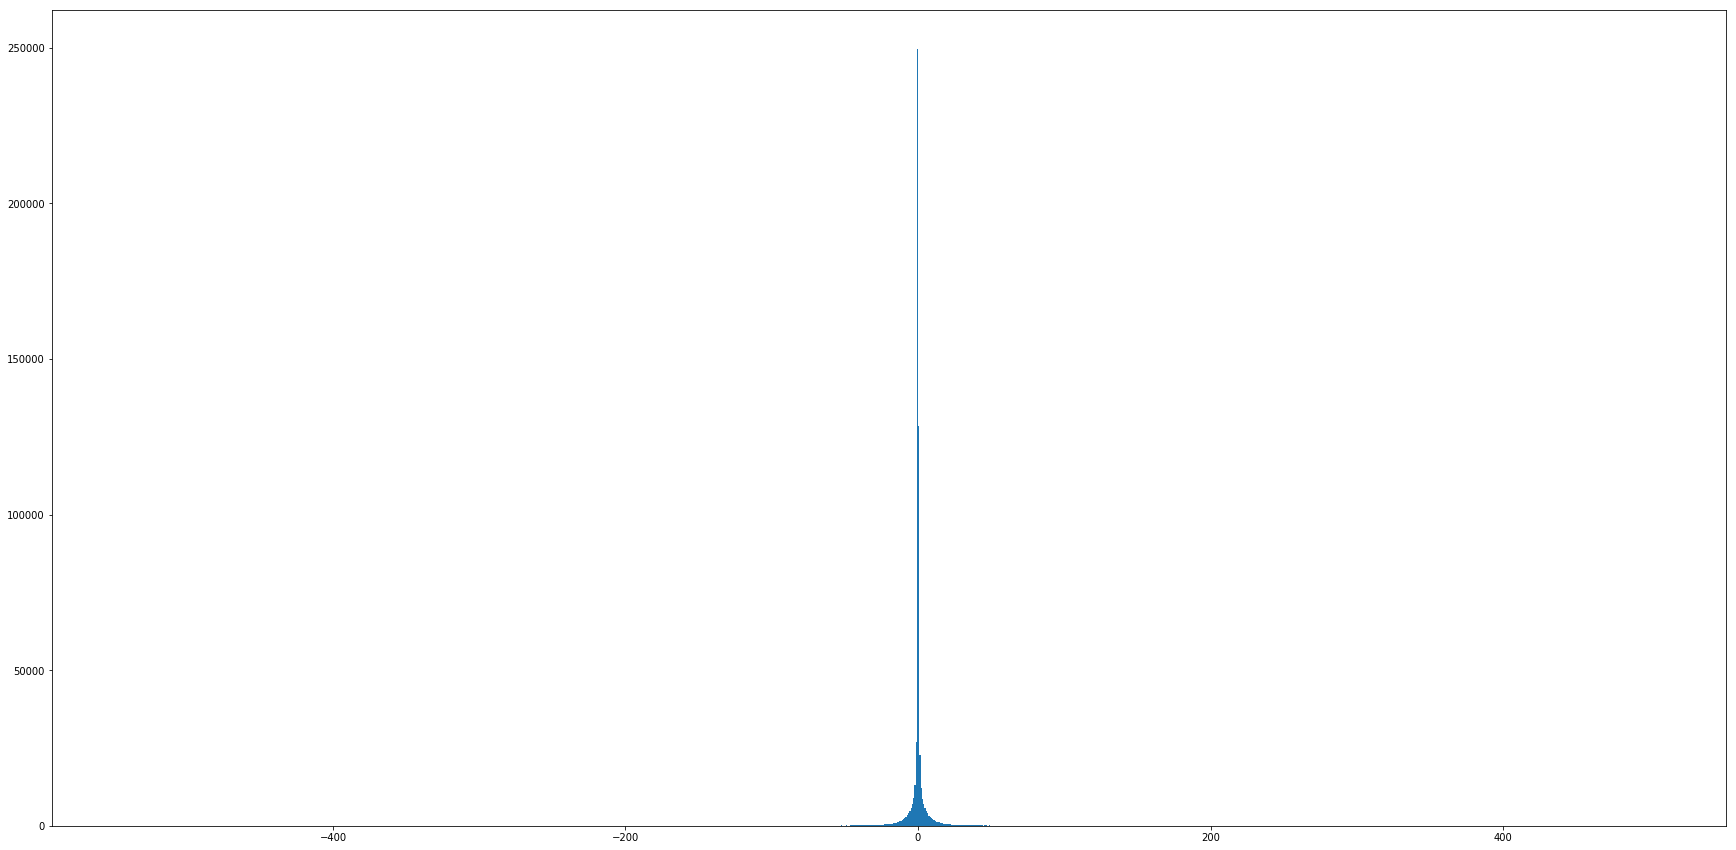

In [9]:
plt.figure(figsize=(30,15))
plt.hist(da,bins =1200)

In [10]:
data['rate'] = (data['Price'] - data['shift_1'])/data['shift_1']

In [11]:
ra = data['rate'].values

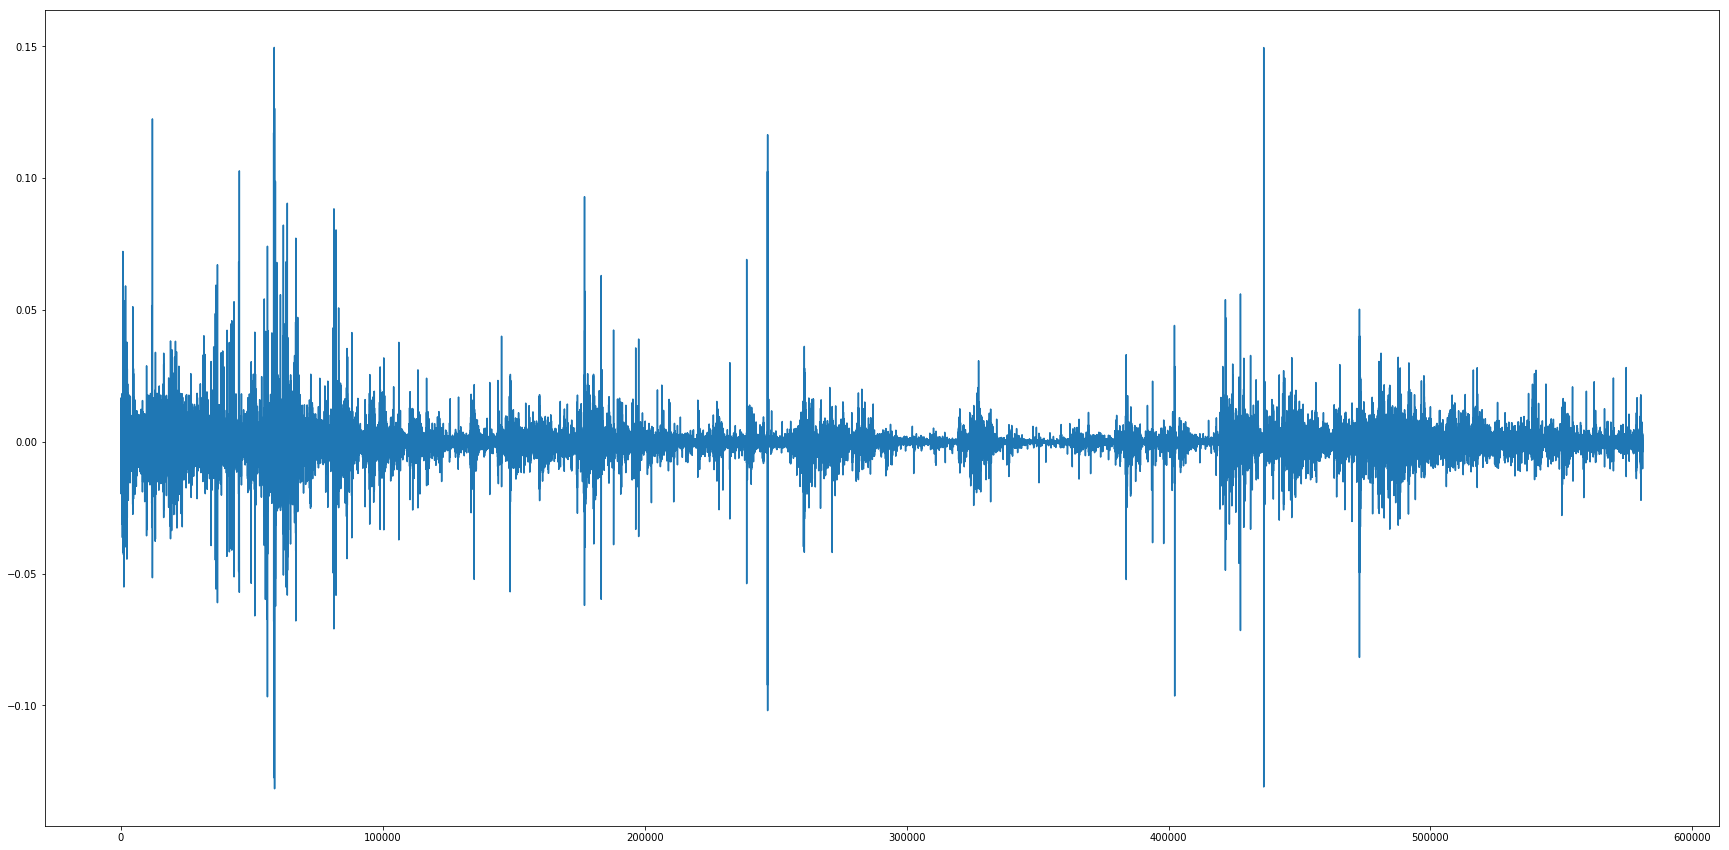

In [13]:
plt.figure(figsize=(30,15))
plt.plot(ra)

(array([1., 0., 1., ..., 0., 0., 2.]),
 array([-0.13161199, -0.13137769, -0.13114338, ...,  0.14908567,
         0.14931997,  0.14955428]),
 <a list of 1200 Patch objects>)

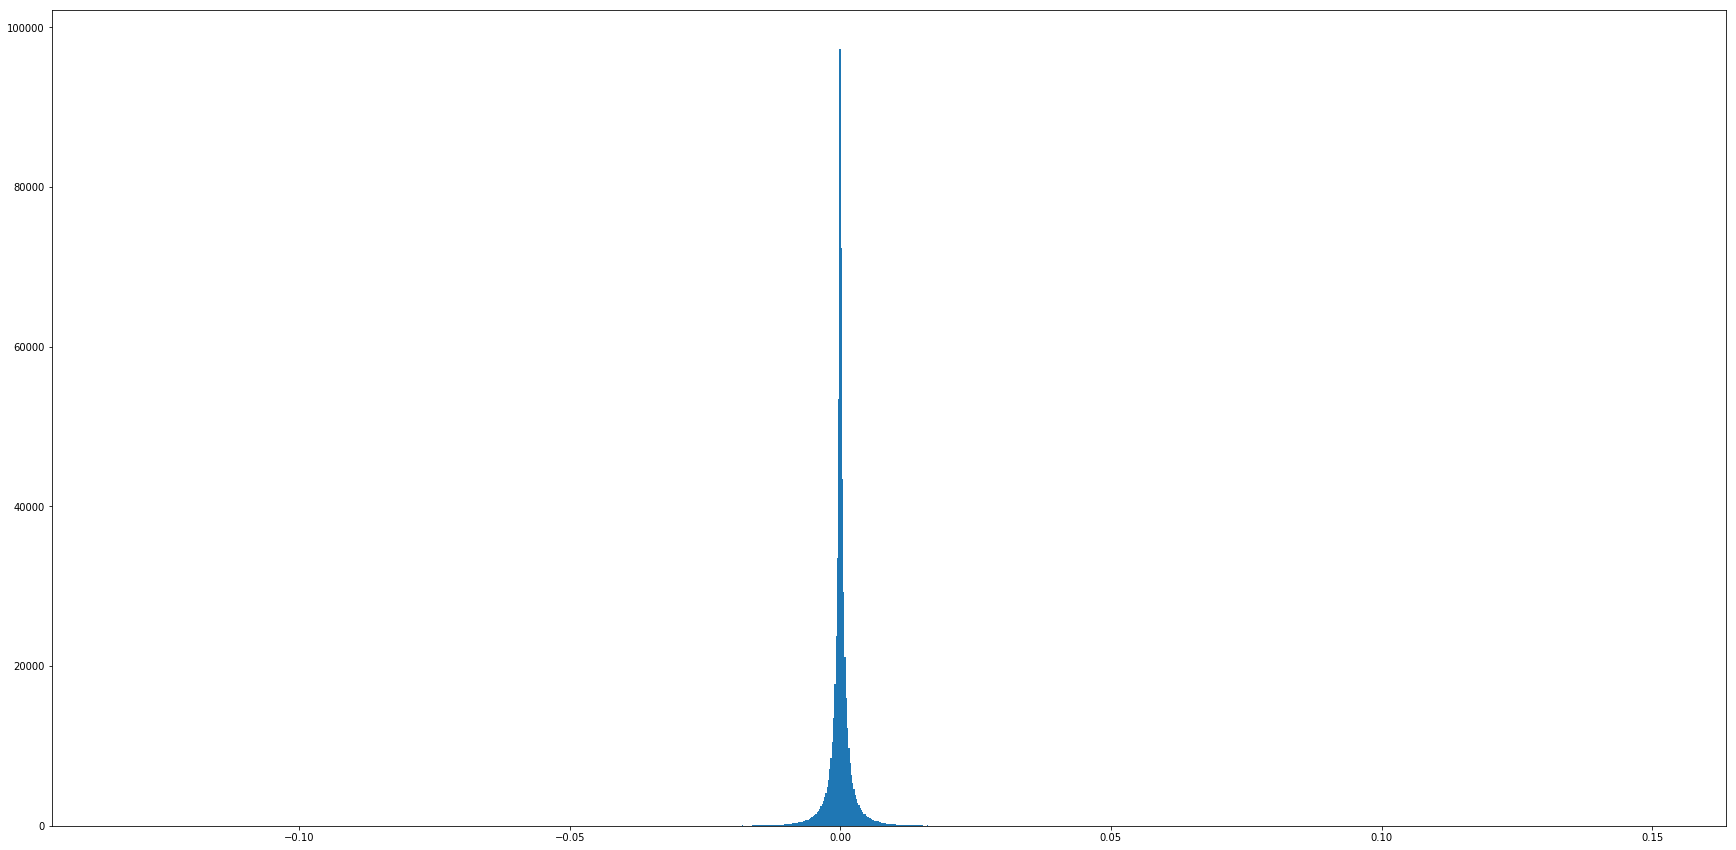

In [95]:
plt.figure(figsize=(30,15))
plt.hist(ra,bins =1200)

In [14]:
def label(value):
    if 0 <= value <= 0.003:
        return 'C+'
    elif 0.003 < value < 0.01 :
        return 'B+'
    elif value > 0.003:
        return 'A+'
    elif -0.003 <= value <= 0:
        return 'C-'
    elif -0.01 < value < -0.003 :
        return 'B-'
    else:
        return 'A-'

In [15]:
trend = [label(i) for i in ra ]

In [16]:
data['trend'] = trend

In [17]:
data.head()

,Date,Price,shift_1,residual,rate,trend
1,2013-04-29 00:05:01,134.480,134.444,0.036,0.000268,C+
2,2013-04-29 00:10:02,134.989,134.480,0.509,0.003785,B+
3,2013-04-29 00:15:01,134.979,134.989,-0.010,-0.000074,C-
4,2013-04-29 00:20:01,134.040,134.979,-0.939,-0.006957,B-
5,2013-04-29 00:25:02,134.960,134.040,0.920,0.006864,B+


In [49]:
price = data['Price'].values[:-3]

In [50]:
trend = trend[:-3]

In [51]:
len(price)

581000

In [52]:
len(trend)

581000

In [60]:
train = price.reshape(-1,10)

In [62]:
trend = np.array(trend).reshape(-1,10)

In [63]:
train[0]

array([134.48 , 134.989, 134.979, 134.04 , 134.96 , 134.6  , 134.96 ,
       134.96 , 134.9  , 134.9  ])

In [64]:
trend[0]

array(['C+', 'B+', 'C-', 'B-', 'B+', 'C-', 'C+', 'C+', 'C-', 'C+'],
      dtype='<U2')

In [65]:
trend[0][0]

'C+'

In [122]:
a = np.array([[1,2,3],[2,2,2]])
b = np.array([[2,3,4],[3,3,3]])
d = np.array(['a','b','c'])

c = np.array([a,b,d])


In [114]:
c

array([array([[1, 2, 3],
       [2, 2, 2]]),
       array([[2, 3, 4],
       [3, 3, 3]]),
       array(['a', 'b', 'c'], dtype='<U1')], dtype=object)

In [118]:
c.shape


(3, 1)

In [104]:
e = np.array([c,c])

In [106]:
e.shape

(2, 3, 1, 3)

In [123]:
c[0]

array([[1, 2, 3],
       [2, 2, 2]])

In [127]:
c[1]

array([[2, 3, 4],
       [3, 3, 3]])